In [2]:

import pandas as pd

#import networkz to visualize crossover data as a network with matplotlib
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
#read in scraped data 

df = pd.read_csv("crossover_links.csv")

In [4]:
df.head()

,from,number_fanfic,to
0,Harry Potter,4022,Twilight
1,Harry Potter,3268,Percy Jackson and the Olympians
2,Harry Potter,2556,Naruto
3,Harry Potter,1867,Avengers
4,Harry Potter,1288,Supernatural


In [3]:
#create an edgelist from the dataframe

g = nx.from_pandas_edgelist(df, 'from', 'to', edge_attr=True)

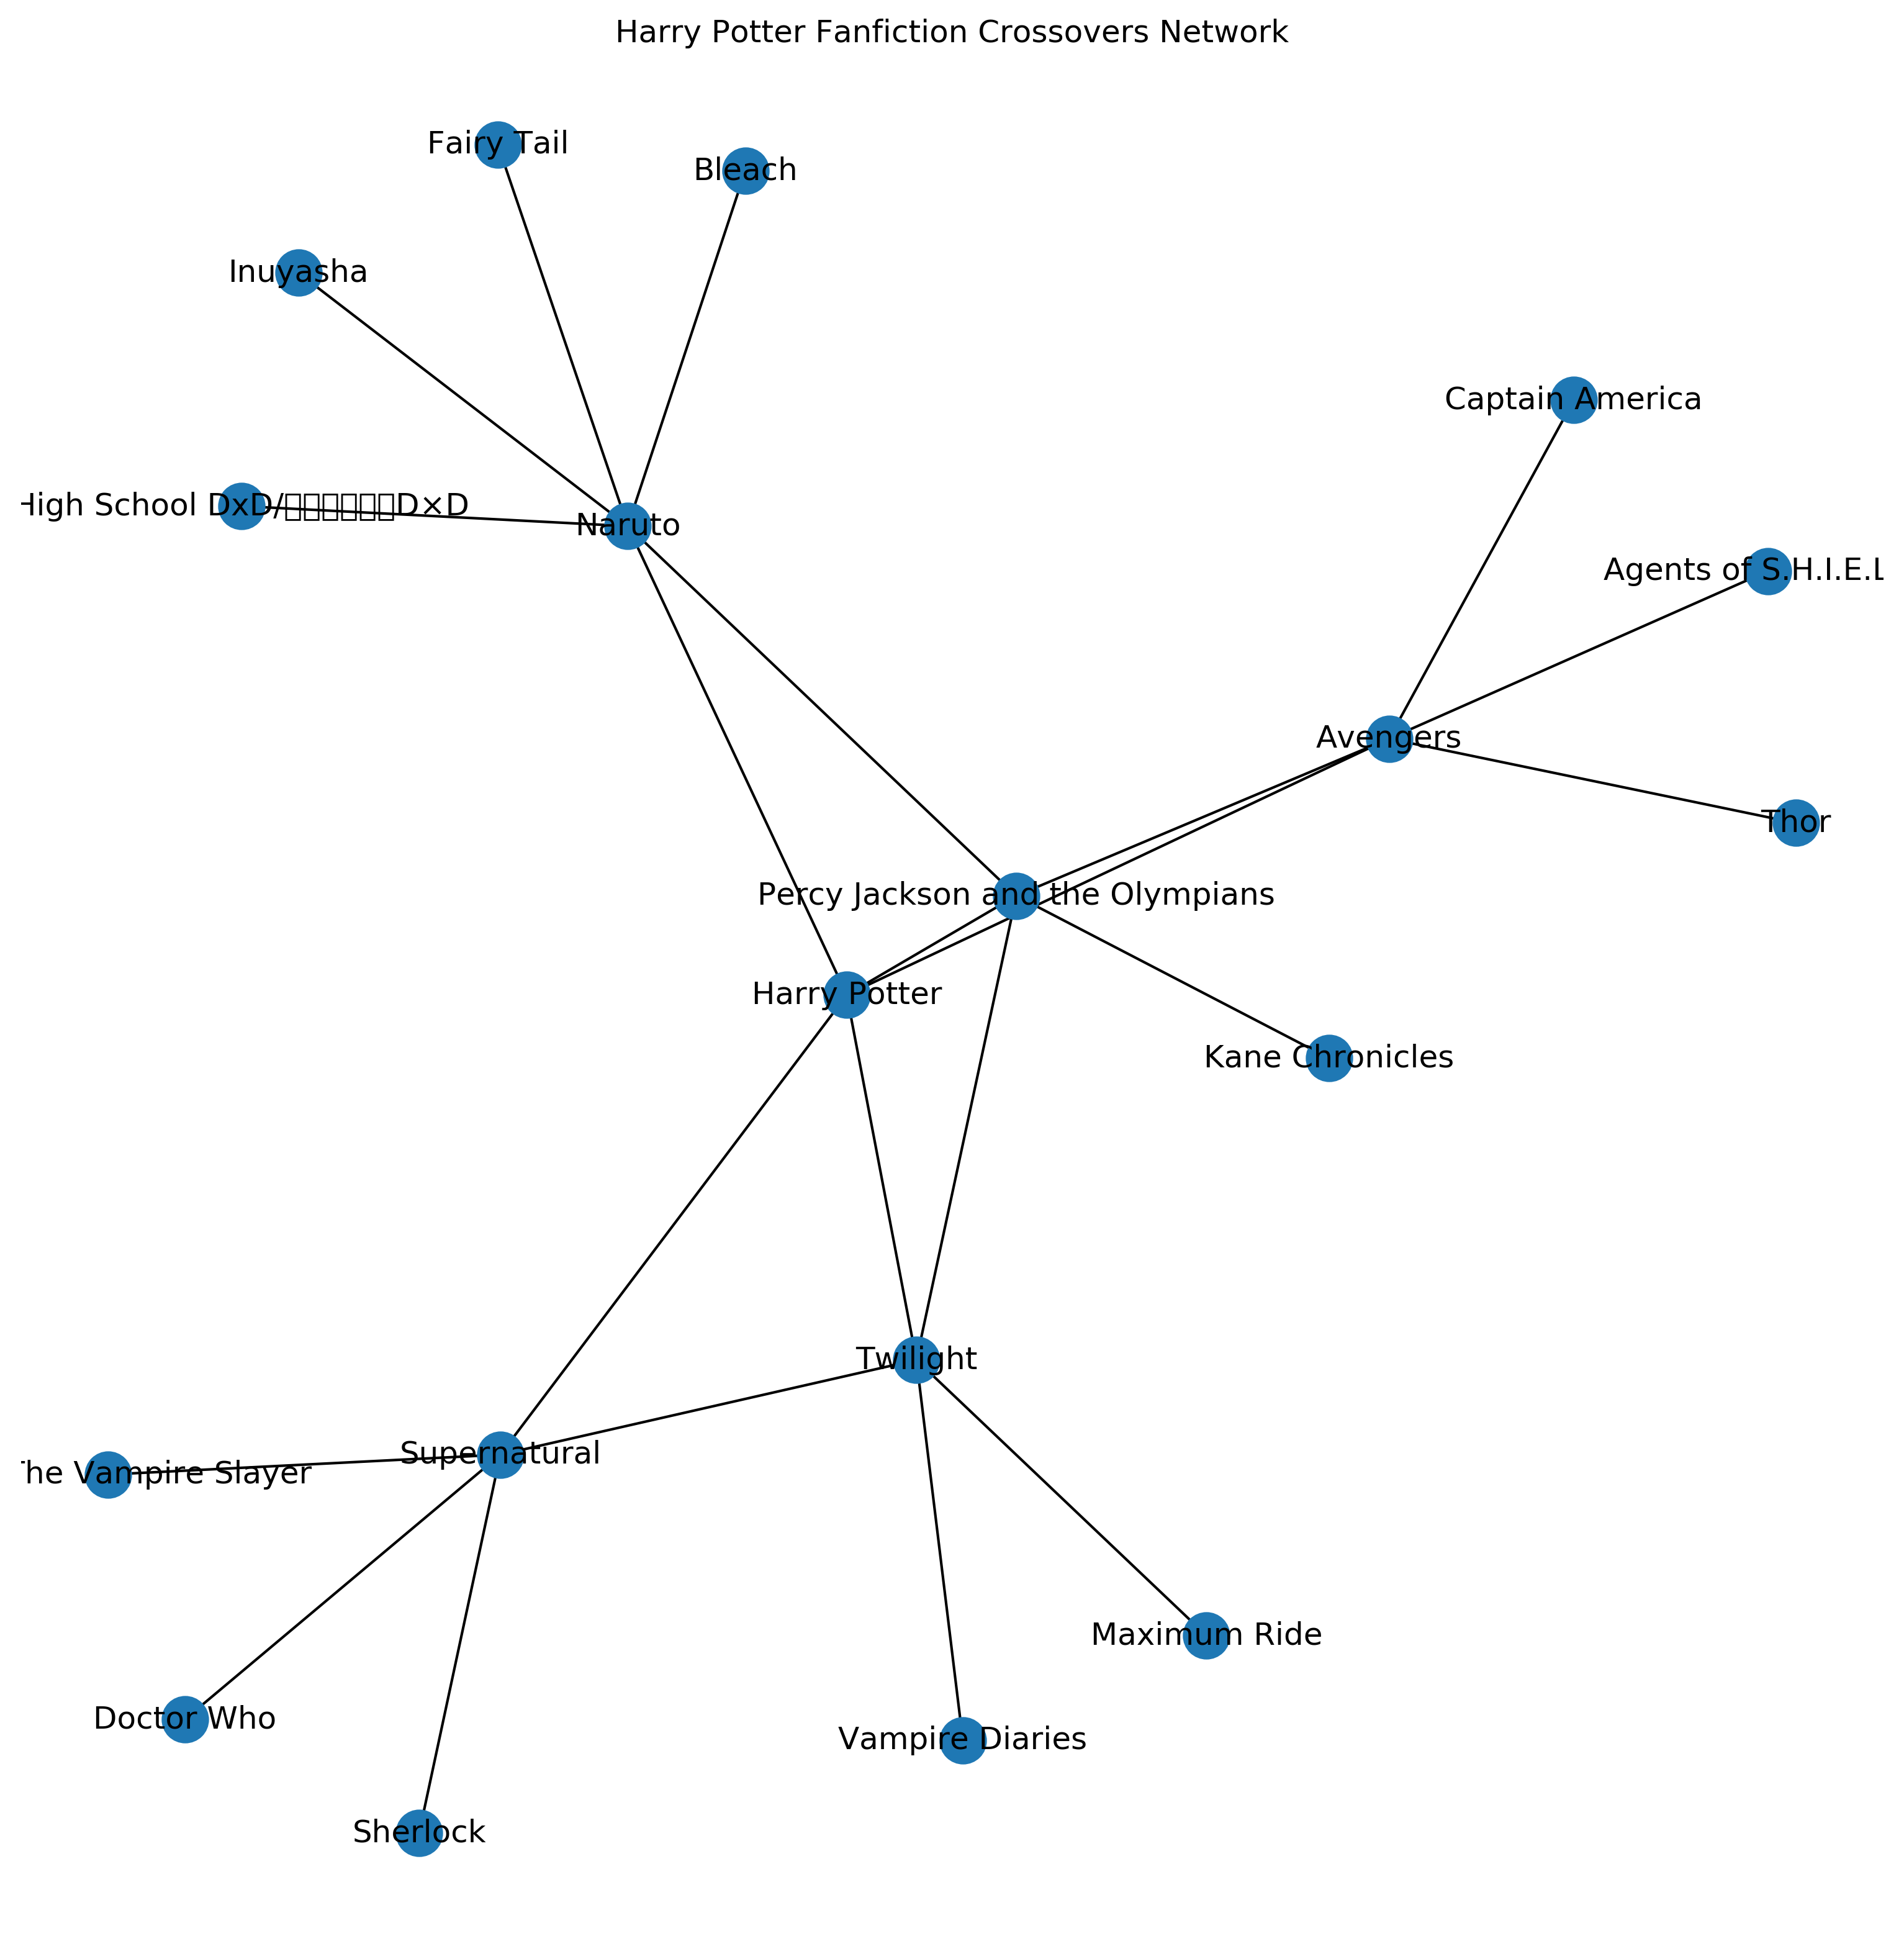

In [11]:
#plot with story labels, uniform node color and size to see inter-connectivity

fig = plt.figure(figsize=(10,10), dpi=300)

nx.draw(g, with_labels=True)

plt.title("Harry Potter Fanfiction Crossovers Network")
fig.savefig('xover.png', dpi=fig.dpi)

From the above plot, we can guess only the connectivity but not neccesarily the strength of connection of the associated HP-crossovers. Some observations:

1. Of the primary cross-overs, `Percy Jackson and the Olympians` seems to have connections with most different first-level cross-overs. By 'first-level crossover' I mean the top 5 fandoms having most number of crossovers with HP.

> - `Percy Jackson and the Olympians`: connected with 4 fandoms `Harry Potter`, `Twilight`, `Avengers`, `Naruto`
> - `Twilight`: connected with 3 fandoms `Harry Potter`, `Percy Jackson` and `Supernatural`
> - `Avengers`, `Naruto` and `Supernatural`: are only connected to 1 fandom each besides `Harry Potter`. 

2. `Naruto` has the most niche 'second-level crossovers' ie. the fandoms it has cross-overs with besides `Harry Potter`

- I scraped 5 top cross-overs for each 'first-level crossover', and some of these fandoms have cross-overs with other 'first-level cross-overs'. 

> - None of 4 second level crossovers(excluding HP) for `Naruto` have connection with any other fandom.
> - `Twilight` has most connected 'second level crossovers' at 3 (including HP)


In [13]:
#Make node_size equal to number of shared fanfics from df

node_sizes = df.number_fanfic.tolist()

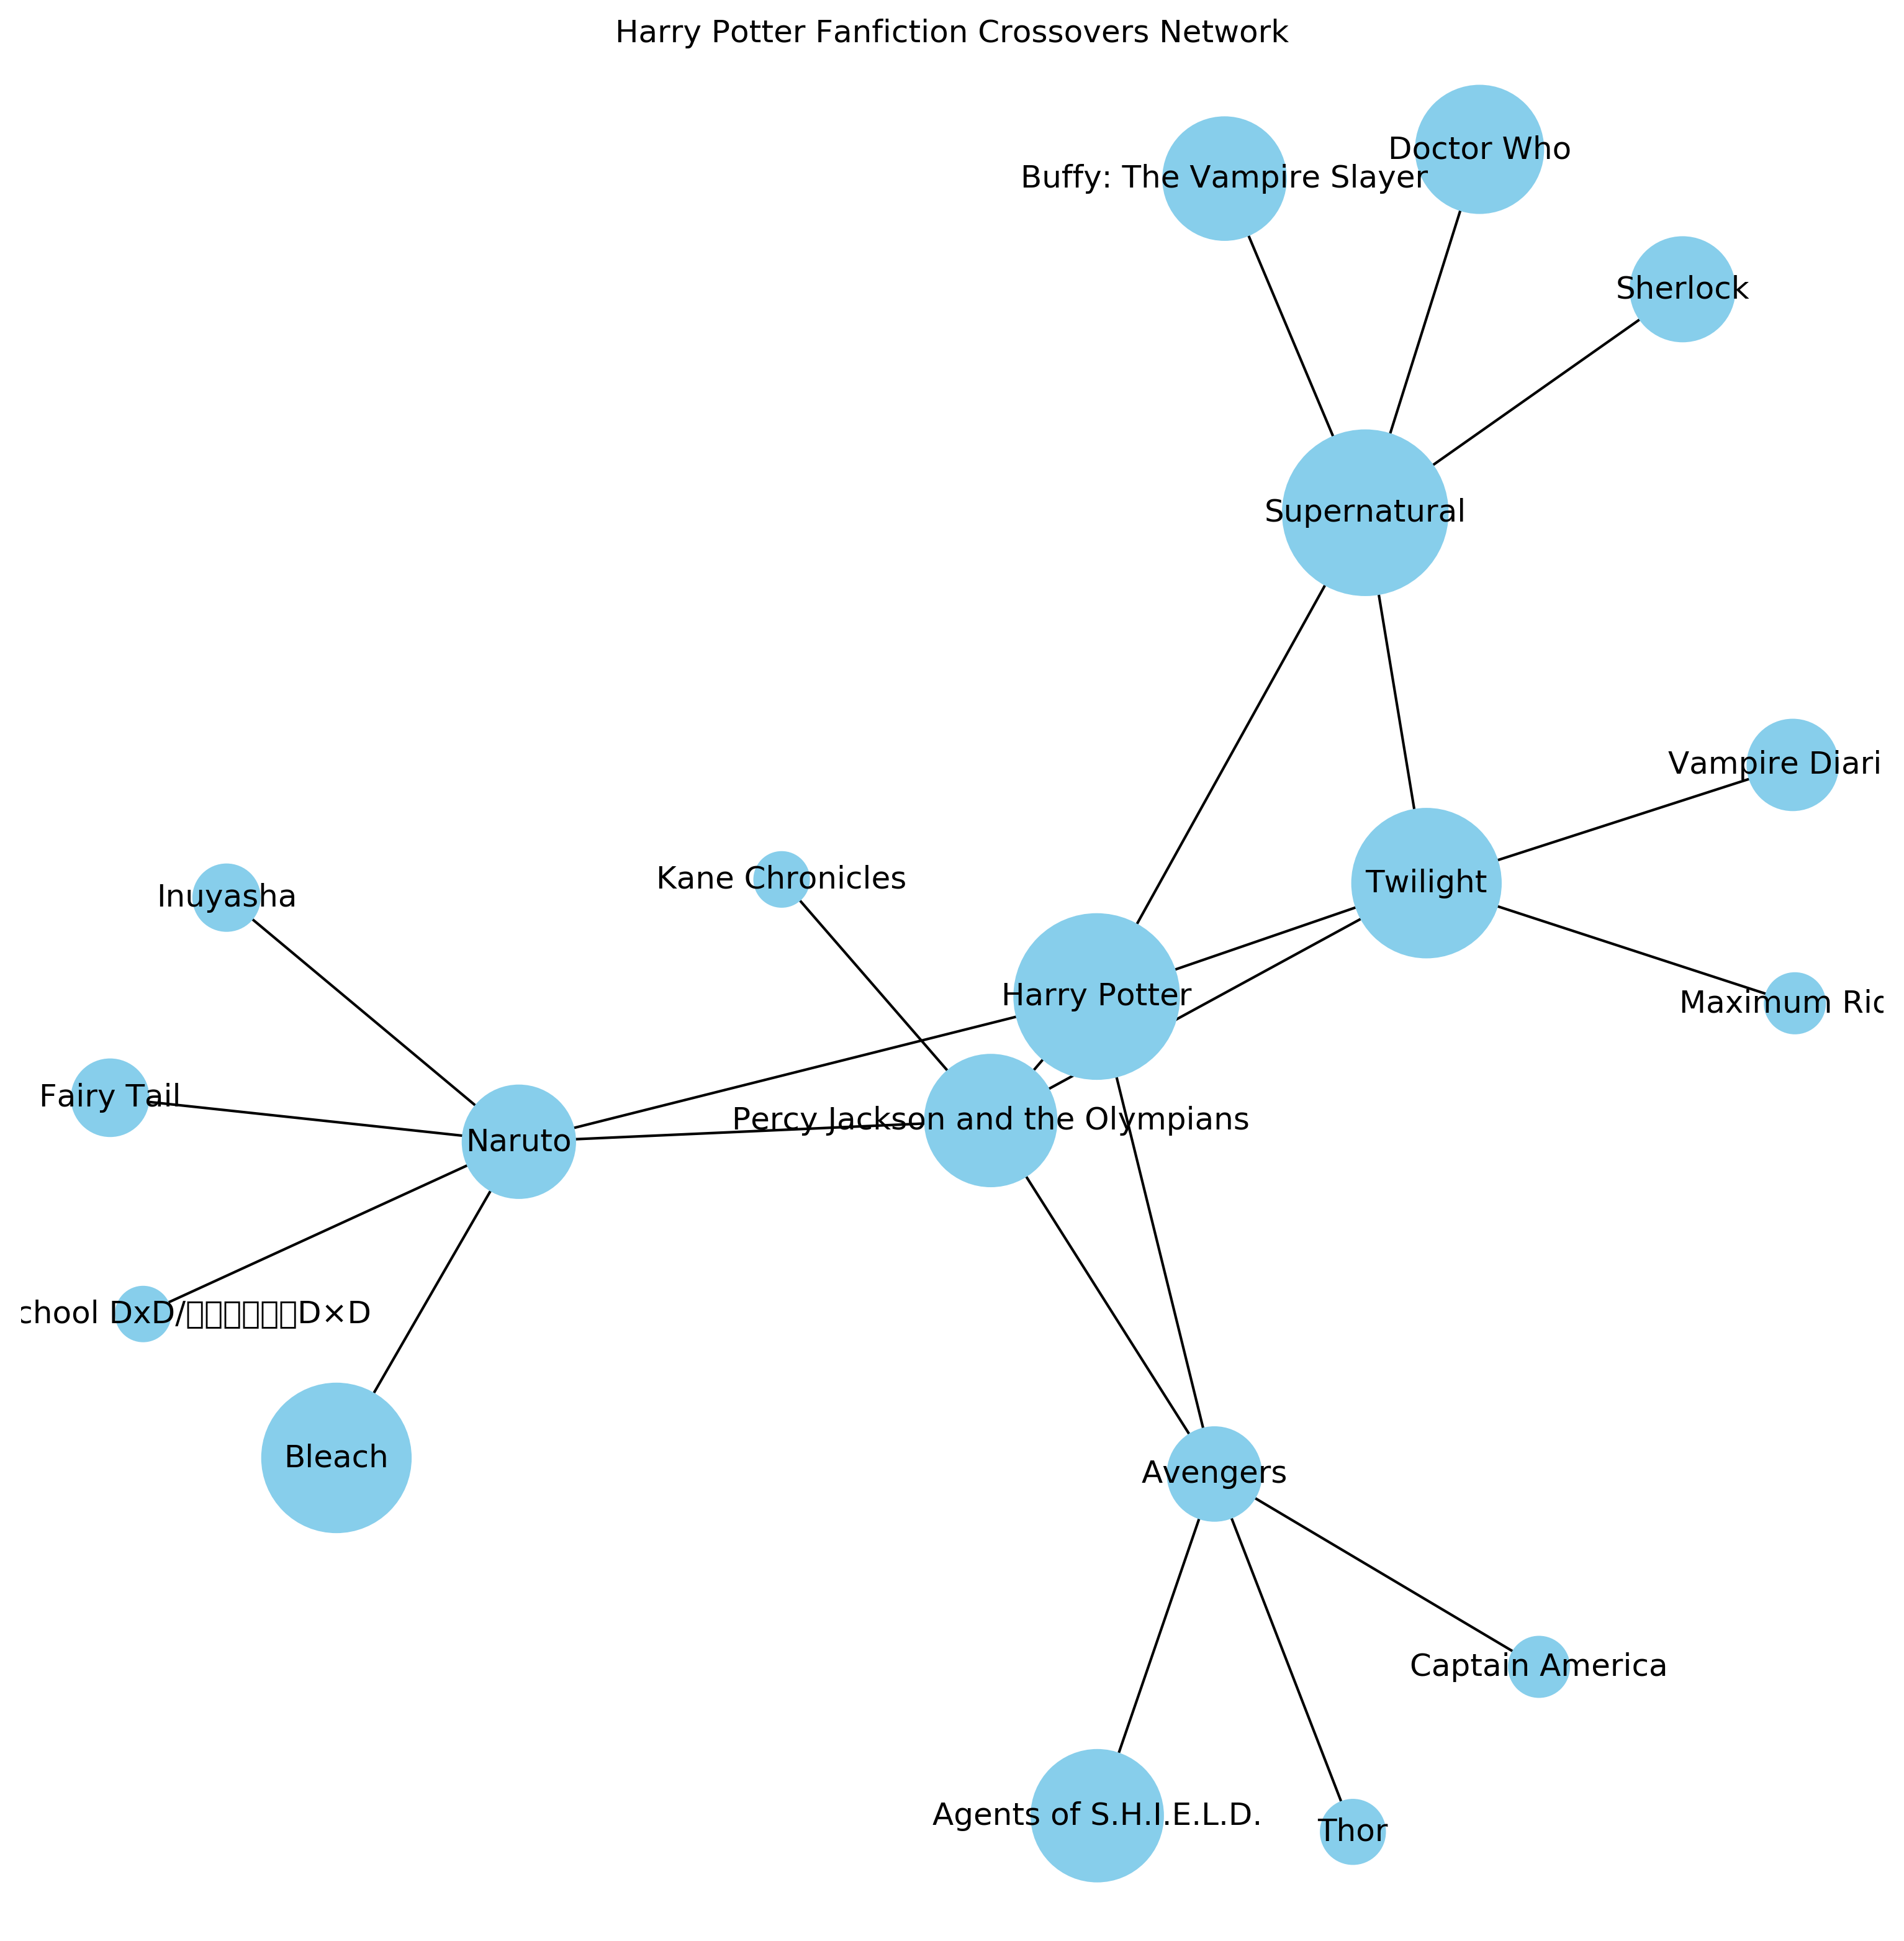

In [14]:
#plot with story labels, and node size corresponding to shared stories to see inter-connectivity
#with a specific algorithm to decide node layout

fig = plt.figure(figsize=(10,10), dpi=300)

nx.draw(g, with_labels=True, node_size= node_sizes, node_color="skyblue", pos=nx.fruchterman_reingold_layout(g))

plt.title("Harry Potter Fanfiction Crossovers Network")
fig.savefig('xover_nodes.png', dpi=fig.dpi)

The node_sizes are based on the edge_values: the number of shared fanfics between the nodes of Edge1. 

Clearly, the diagram is not representative of what the reality is. By using the column directly its unclear. The column will need to be wrangled to create a node_size list for a value corresponding to every node which I will do shortly. 